In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./train.csv')
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
73,74,20,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2010,WD,Normal,144900
199,200,20,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,274900
1124,1125,80,RL,NaN,9125,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,163900
1315,1316,60,RL,85.0,11075,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,206900
1354,1355,60,RL,NaN,10316,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,235000


In [3]:
df.shape

(1460, 81)

### Check Null Values

In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 300)
# pd.set_option('display.width', 1000)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

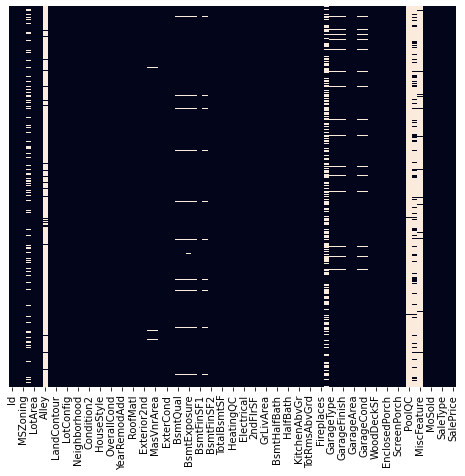

In [6]:
plt.figure(figsize=(8,7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

### Drop columns with more than 80% Null values

In [7]:
df.drop(['Alley','PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [8]:
df.drop(['Id'], axis=1, inplace=True)

### Handle Missing Values

In [9]:
df['LotFrontage'] = df.LotFrontage.fillna(df.LotFrontage.mean())

In [10]:
df['BsmtQual'] = df.BsmtQual.fillna(df.BsmtQual.mode()[0])
df['BsmtCond'] = df.BsmtCond.fillna(df.BsmtCond.mode()[0])
df['BsmtExposure'] = df.BsmtExposure.fillna(df.BsmtExposure.mode()[0])
df['BsmtFinType1'] = df.BsmtFinType1.fillna(df.BsmtFinType1.mode()[0])
df['BsmtFinType2'] = df.BsmtFinType2.fillna(df.BsmtFinType2.mode()[0])

In [11]:
df['Electrical'] = df.Electrical.fillna(df.Electrical.mode()[0])

In [12]:
df['FireplaceQu'] = df.FireplaceQu.fillna(df.FireplaceQu.mode()[0])

In [13]:
df['GarageCond'] = df.GarageCond.fillna(df.GarageCond.mode()[0])
df['GarageFinish'] = df.GarageFinish.fillna(df.GarageFinish.mode()[0])
df['GarageQual'] = df.GarageQual.fillna(df.GarageQual.mode()[0])
df['GarageType'] = df.GarageType.fillna(df.GarageType.mode()[0])
df['GarageYrBlt'] = df.GarageYrBlt.fillna(df.GarageYrBlt.mean())

<AxesSubplot:>

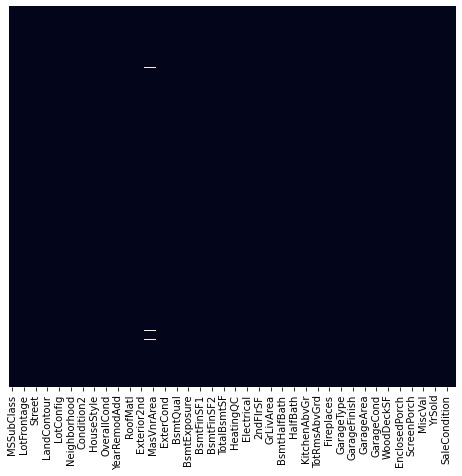

In [15]:
plt.figure(figsize=(8,7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(1452, 76)

### Handle Categorical Features (Using One-hot Enconding)

In [68]:
# columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood','Condition1', 
#            'Condition2', 'BldgType', 'HouseStyle', 'SaleType','SaleCondition', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
#            'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd', 
#            'MasVnrType', 'Heating', 'HeatingQC','CentralAir', 'Electrical', 'KitchenQual', 'Functional','FireplaceQu', 'GarageType', 
#            'GarageFinish','GarageQual', 'GarageCond', 'PavedDrive']

In [69]:
# len(columns)

39

In [45]:
def print_unique_col_values(df):
    
    columns = []
    for col in df:
        if df[col].dtype == 'object':
            columns.append(col)
    
    return columns

In [48]:
columns = print_unique_col_values(df)
len(columns)

39

In [49]:
main_df = df.copy()

### Combine Train Data with Test Data 
##### (Test Data have some categorical values that are not in Train Data)

In [50]:
test_df = pd.read_csv('formulatedTest.csv')

In [51]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [52]:
test_df.shape

(1459, 74)

In [53]:
df.shape

(1452, 76)

In [77]:
combined_df = pd.concat([df, test_df], axis=0)

In [78]:
combined_df.shape

(2911, 76)

In [79]:
def category_onehot_multcols(multcolumns):
    df_final = combined_df
    i=0
    for col in multcolumns:
        
        new_cols = pd.get_dummies(combined_df[col], drop_first=True)
        print(col)
#         print(new_cols)
        combined_df.drop([col], axis=1, inplace=True)
        
        if i==0:
            df_final = new_cols.copy()
        else:
            df_final = pd.concat([df_final, new_cols], axis=1)
        i += 1
        
    df_final = pd.concat([combined_df, df_final], axis=1)
    
    return df_final

In [80]:
combined_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [81]:
combined_df.shape

(2911, 237)

### Drop Duplicate Columns

In [103]:
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

In [104]:
combined_df.shape

(2911, 177)

### Train Test Split

In [105]:
df_train = combined_df.iloc[:1452, :]
df_test = combined_df.iloc[1452:, :]

In [106]:
df_test.drop(['SalePrice'], axis=1, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_8628\3029927858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice'], axis=1, inplace=True)


In [107]:
df_test.shape

(1459, 176)

In [108]:
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

In [109]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(X, y)

C:\Users\dell\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\dell\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Save Model

In [110]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [111]:
y_pred = classifier.predict(df_test)

In [112]:
len(y_pred)

1459

### Create Sample Submission File and Submit

In [113]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv', index=False)